<a href="https://colab.research.google.com/github/smartgrids-aau/GreenCodesPython/blob/main/Exemple_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

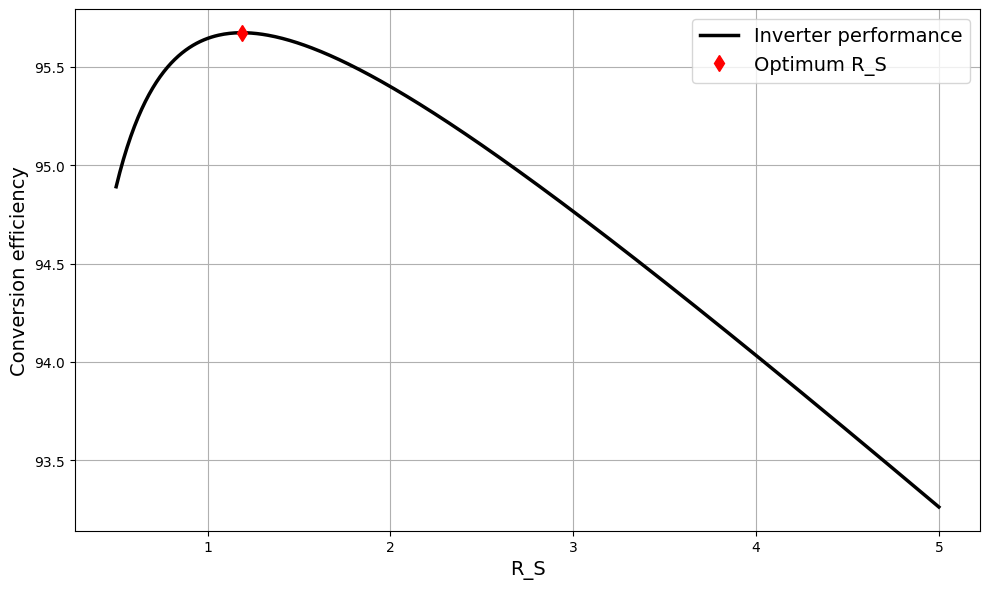

In [5]:
# Example 5.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Excel data
file_name = 'Malaysian Daily Solar Data.xls'
sheet_name = 'Kuala Lumpur'
E_Solar = pd.read_excel(file_name, sheet_name=sheet_name, usecols="E", skiprows=7306, nrows=366)
Solar_Rad = (E_Solar.values.flatten() / 12) * 1000

AV_InvEff = []
Rs = []

for Rsi in np.arange(0.5, 5.01, 0.01):
    Rs.append(Rsi)
    Pm = 2
    InvC = Pm / Rsi
    P_Ratio = (Pm * (Solar_Rad / 1000)) / InvC
    InvEffi = 97.644 - (P_Ratio * 1.995) - (0.445 / P_Ratio)

    P = InvEffi[InvEffi >= 0]
    Av = np.sum(P) / len(P)
    AV_InvEff.append(Av)

# Convert to numpy arrays for plotting
Rs = np.array(Rs)
AV_InvEff = np.array(AV_InvEff)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Rs, AV_InvEff, '-k', linewidth=2.5)

# Find optimal point
max_eff = np.max(AV_InvEff)
max_index = np.argmax(AV_InvEff)
opt_rs = 0.5 + max_index * 0.01

plt.plot(opt_rs, max_eff, 'd', markerfacecolor='red', markeredgecolor='red', markersize=8)

plt.xlabel('R_S', fontsize=14)
plt.ylabel('Conversion efficiency', fontsize=14)
plt.legend(['Inverter performance', 'Optimum R_S'], fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()
